# Quick Start for Segment Anything with Microscopy

This notebook shows how to get quickly started with `µsam` (Segment Anything for Microscopy).

Here, we show the very basic necessary functions to automatically segment a microscopy image using [µsam](https://github.com/computational-cell-analytics/micro-sam).  

## Running this notebook

If you have an environment with `µsam` on your computer you can run this notebook in there. You can follow the [installation instructions](https://computational-cell-analytics.github.io/micro-sam/micro_sam.html#installation) to install it on your computer.

You can also run this notebook in the cloud on [Kaggle Notebooks](https://www.kaggle.com/code/). This service offers free usage of a GPU to speed up running the code. The next collapsible section guides you through the installation for you if you are using it. You can skip them if you have `micro_sam` installed.

<details>

<summary><strong>Click here for more installation details.</strong></summary>

## Install `condacolab` for Package Management

**IMPORTANT**: This step is only necessary if you are running this notebook in Kaggle Notebooks (tested) / Google Colab. **Please skip these cells and go to `Importing the libraries` if you are running the notebook on your own computer with `micro_sam` already installed.**

The first step for running the notebook on the above mentioned cloud platforms is to have a package manager to install `µsam` and other relevant packages.

**NOTE**: Please run the next two blocks of code in new cells one after the other.

# Step 1: Install `condacolab` on Kaggle Notebooks (tested) / Google Colab for installing conda and other related package managers.

```bash
!pip install -q condacolab
import condacolab
condacolab.install()
```

> **NOTE**: When you run the previous block of code, the kernel should restart automatically in Kaggle Notebooks (tested). Please proceed further without the need of any manual kernel restarts.

# Step 2: Validate if `condacolab` was installed correctly.

```bash
import condacolab
condacolab.check()
```

> If you see `✨🍰✨ Everything looks OK!` in the previous code block's output, you are good to proceed the next code block!

## Checking system information

```python
# Check if we are running this notebook on Kaggle, Google Colab or local compute resources.
import os
current_spot = os.getcwd()

if current_spot.startswith("/kaggle/working"):
    print("Kaggle says hi!")
    root_dir = "/kaggle/working"

elif current_spot.startswith("/content"):
    print("Google Colab says hi!")
    print(" NOTE: The scripts have not been tested on Google Colab, you might need to adapt the installations a bit.")
    root_dir = "/content"

else:
    msg = "You are using a behind-the-scenes resource. Follow our installation instructions here:"
    msg += " https://computational-cell-analytics.github.io/micro-sam/micro_sam.html#installation"
    print(msg)
    root_dir = ""  # overwrite to set the root directory, where the data, checkpoints, and all relevant stuff will be stored
```

### Installation

The next code block will install the `micro_sam` library on Kaggle Notebooks. **Please skip these cells and go to `Importing the libraries` if you are running the notebook on your own computer.**

```bash
# Install `micro-sam` and `stackview` (https://github.com/haesleinhuepf/stackview) from `conda-forge`.
!mamba install -y -q -c conda-forge micro_sam stackview > /dev/null 2>&1
!pip uninstall -y --quiet napari  # GUI backends are not supported in Kaggle / Google Colab, let's remove it to avoid errors.
```

> NOTE:
Known Issues on **Kaggle Notebooks** (for the `Importing the libraries` section below):

1. ```bash
    2024-05-08 14:56:42.941557: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
    2024-05-08 14:56:42.941680: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
    2024-05-08 14:56:43.062385: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
    ```

    - We have received this warning while testing this notebook on Kaggle. We suspect that the complains originate from the tensorflow suite. It does not lead to any issues while making use of the installed packages. You can proceed and ignore the warnings.

## Importing the libraries

NOTE: For result visualization, we use [stackview](https://github.com/haesleinhuepf/stackview) (if you are running the notebook on your own computer, you can install `stackview` from `conda-forge` using `conda install -c conda-forge stackview` or using `pip`: `pip install stackview`).

In [2]:
import torch
print('CUDA avail:', torch.cuda.is_available())

CUDA avail: True


In [1]:
import stackview

from skimage.data import cells3d

from micro_sam.automatic_segmentation import get_predictor_and_segmenter, automatic_instance_segmentation

/home/ads4015/micromamba/envs/micro-sam-gpu/lib/python3.10/site-packages/kornia/feature/lightglue.py:44: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  @torch.cuda.amp.custom_fwd(cast_inputs=torch.float32)


We load an example image from the [scikit-image](https://scikit-image.org/docs/stable/api/skimage.data.html) library.

[[4496 5212 6863 ... 2917 2680 2642]
 [4533 5146 7555 ... 2843 2857 2748]
 [4640 6082 8452 ... 3372 3039 3128]
 ...
 [1339 1403 1359 ... 4458 4314 4795]
 [1473 1560 1622 ... 3967 4531 4204]
 [1380 1368 1649 ... 3091 3558 3682]]
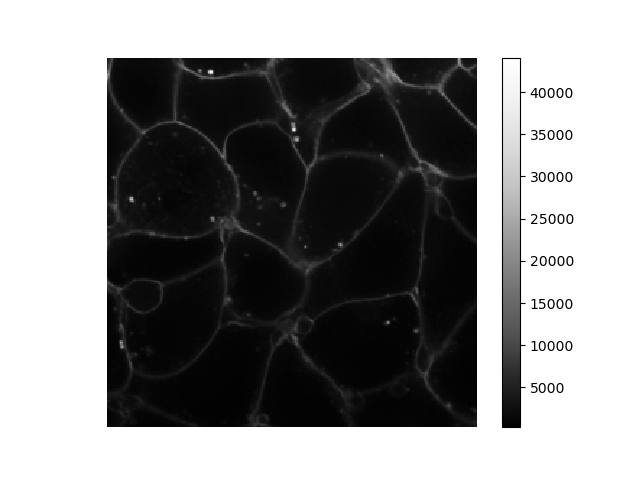
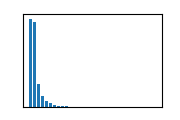

In [3]:
image = cells3d()[30, 0]

# Visualize the image.
stackview.insight(image)

Loading a pre-trained micro-sam model and applying it to an image just takes two lines of python code:

Updating file 'vit_b_lm' from 'https://uk1s3.embassy.ebi.ac.uk/public-datasets/bioimage.io/diplomatic-bug/1.1/files/vit_b.pt' to '/home/ads4015/.cache/micro_sam/models'.
100%|████████████████████████████████████████| 375M/375M [00:00<00:00, 732GB/s]
Updating file 'vit_b_lm_decoder' from 'https://uk1s3.embassy.ebi.ac.uk/public-datasets/bioimage.io/diplomatic-bug/1.1/files/vit_b_decoder.pt' to '/home/ads4015/.cache/micro_sam/models'.
100%|█████████████████████████████████████| 44.1M/44.1M [00:00<00:00, 84.6GB/s]
Initialize instance segmentation with decoder: 100%|██████████| 1/1 [00:00<00:00,  3.09it/s]


[[ 1  1  1 ...  6  6  6]
 [ 1  1  1 ...  6  6  6]
 [ 1  1  1 ...  6  6  6]
 ...
 [38 38 38 ... 34 34 34]
 [38 38 38 ... 34 34 34]
 [38 38 38 ... 34 34 34]]
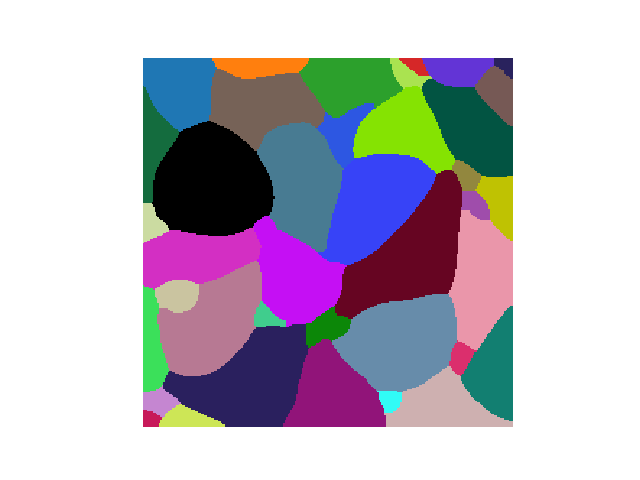

In [4]:
# Load the Segment Anything for Microscopy model.
predictor, segmenter = get_predictor_and_segmenter(model_type="vit_b_lm")

# Run automatic instance segmentation (AIS) on our image.
instances = automatic_instance_segmentation(
    predictor=predictor,
    segmenter=segmenter,
    input_path=image,
)

# Visualize the instance segmentation result.
stackview.insight(instances)


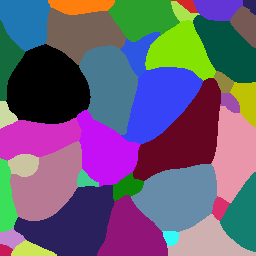

In [5]:
# We can also quickly show the instance segmentation overlay using an animated curtain with 'stackview'.
stackview.animate_curtain(image, instances)

## What next?

Question: Are you happy with the segmentation on your data?
1. If your answer is "YES", looks like you are good to go with your segmentations. Feel free to test it on your data.
2. If you think there are missed out objects / incorrect segmentations, and there is room for improvement:
    1. We recommend you to use our napari-based [annotation tool](https://computational-cell-analytics.github.io/micro-sam/micro_sam.html#annotation-tools) to improve your segmentations.
    2. If you want to improve the automatic segmentation quality, we recommend you to finetune the default SAM models OR the `µsam` models, based on your initial assessment of the segmentation quality of both models.
3. If you think the models perform poorly, we recommend you to finetune the default SAM models on your custom dataset. There are two situations here:
    1. In case you do not have any ground-truth labels, we recommend generating the desired labels using our [annotator tool](https://computational-cell-analytics.github.io/micro-sam/micro_sam.html#annotation-tools)
    2. In case you do have ground-truth labels, we suggest going ahead with finetuning already (you can choose to use the [python scripts](https://github.com/computational-cell-analytics/micro-sam/blob/master/examples/finetuning/finetune_hela.py) or the [tool](https://computational-cell-analytics.github.io/micro-sam/micro_sam.html#finetuning-ui) or the [CLI](https://computational-cell-analytics.github.io/micro-sam/micro_sam.html#using-the-command-line-interface-cli) for this.)

[Here](https://github.com/computational-cell-analytics/micro-sam/blob/master/notebooks/sam_finetuning.ipynb) is the link to the notebook on how to get quickly started with finetuning on your custom dataset.

*This notebook was last ran on May 5, 2025*

In [8]:
from pathlib import Path
import nibabel as nib
import numpy as np

# Root for your finetune patches
root = Path("/midtier/paetzollab/scratch/ads4015/data_selma3d/selma3d_finetune_patches")

# Choose which class to start with
# CLASS = "amyloid_plaque_patches"  # or: "c_fos_positive_patches", "cell_nucleus_patches", "vessels_patches"
CLASS = "cell_nucleus_patches"

# Pick a specific patch (change name as needed)
image_path = root / CLASS / "patch_003_vol007_ch0.nii.gz"
label_path = root / CLASS / "patch_003_vol007_ch0_label.nii.gz"

print("Image:", image_path)
print("Label:", label_path)

# --- Load image ---
img_nii = nib.load(str(image_path))
image = img_nii.get_fdata().astype(np.float32)  # shape ~ (Z, Y, X) or (Z, Y, X, C)

print("Raw image shape:", image.shape, "dtype:", image.dtype)

# If you ever have multi-channel volumes, select a channel here.
# For now we assume your patches are single-channel:
assert image.ndim == 3, f"Expected 3D patch, got shape {image.shape}"

# Simple per-volume min–max normalization to [0, 1]
imin, imax = image.min(), image.max()
if imax > imin:
    image = (image - imin) / (imax - imin)
print("Normalized image range:", float(image.min()), float(image.max()))

# --- Load label (ground truth, if present) ---
lab_nii = nib.load(str(label_path))
gt_labels = lab_nii.get_fdata().astype(np.int32)

print("Label shape:", gt_labels.shape, "dtype:", gt_labels.dtype)
assert gt_labels.shape == image.shape, "Image and label shapes must match!"

# Optionally inspect unique label values
print("Unique labels:", np.unique(gt_labels))


Image: /midtier/paetzollab/scratch/ads4015/data_selma3d/selma3d_finetune_patches/cell_nucleus_patches/patch_003_vol007_ch0.nii.gz
Label: /midtier/paetzollab/scratch/ads4015/data_selma3d/selma3d_finetune_patches/cell_nucleus_patches/patch_003_vol007_ch0_label.nii.gz
Raw image shape: (96, 96, 96) dtype: float32
Normalized image range: 0.0 1.0
Label shape: (96, 96, 96) dtype: int32
Unique labels: [0 1]


[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
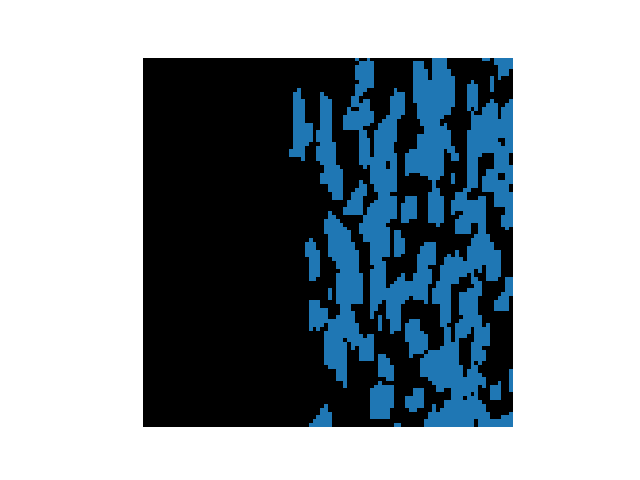

In [9]:
import stackview
stackview.insight(image)          # raw
stackview.insight(gt_labels)    # GT segmentation, if you want to see instances/foreground


In [10]:
from micro_sam.automatic_segmentation import get_predictor_and_segmenter, automatic_instance_segmentation

# Use the light-microscopy model (good default for your data)
model_type = "vit_b_lm"  # LM model; microSAM will download the checkpoint into its cache

predictor, segmenter = get_predictor_and_segmenter(
    model_type=model_type,
    # device=None -> auto-selects GPU if available, else CPU
    device=None,
    # amg=None -> will use AIS (with decoder) if available, else AMG
    amg=None,
)

print("Loaded model:", model_type)


Loaded model: vit_b_lm


In [12]:
# Run 3D automatic instance segmentation on the in-memory numpy array.
# We pass ndim=3 explicitly so it uses the volumetric path.
instances = automatic_instance_segmentation(
    predictor=predictor,
    segmenter=segmenter,
    input_path=image,        # can be np.ndarray or file path; here we pass the array
    ndim=3,                  # 3D volume
    tile_shape=None,         # no tiling needed for 96^3 patches
    halo=None,
    verbose=True,
    return_embeddings=False, # set True if you also want embeddings back
    # You can add generate_kwargs here later (e.g. min_object_size, thresholds, etc.)
)

print("Instance segmentation shape:", instances.shape, "dtype:", instances.dtype)
print("Unique instance ids:", np.unique(instances)[:20], "...")


Merge segmentation: 100%|██████████| 1/1 [00:00<00:00, 73.93it/s]

Instance segmentation shape: (96, 96, 96) dtype: uint32
Unique instance ids: [0 1 2 3 4 5 6 7] ...


[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
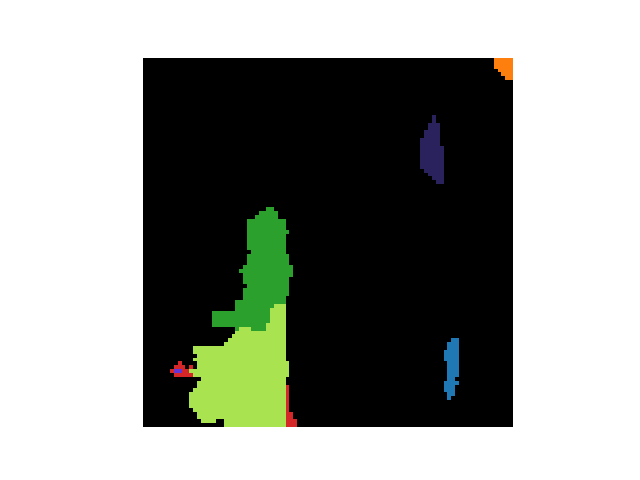

In [15]:
import stackview

# Overlay: label 0 is background, >0 are instances
stackview.insight(instances)




In [16]:
# Quick-and-dirty foreground Dice vs your GT (assuming gt_labels is binary or instance ids > 0)
pred_fg = (instances > 0).astype(np.uint8)
gt_fg = (gt_labels > 0).astype(np.uint8)

intersection = (pred_fg & gt_fg).sum()
dice = 2 * intersection / (pred_fg.sum() + gt_fg.sum() + 1e-8)
print("Foreground Dice (microSAM vs GT):", dice)


Foreground Dice (microSAM vs GT): 0.015778421022750566
